# Ideas

Can we find evidence among all contexts of positive examples of a property by comparing them to the contexts of all negative examples?

Here, similar concepts should come in handy, as there should be a lot of overlap in their contexts. Distinctive aspects should be all the more salient. 



In [7]:
import json
import pandas as pd

from tqdm import tqdm
import os

from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
import seaborn as sn

#import gzip
#from nltk import word_tokenize, sent_tokenize
#import stanfordnlp
#from stanfordnlp.server import CoreNLPClient
#from nltk.corpus import stopwords

In [19]:
def load_data(prop):
    path = f'../data/aggregated/{prop}.json'
    with open(path) as infile:
        prop_dict = json.load(infile)
    return prop_dict

def combine_contexts(prop, label, target_words):
    
    c = ''
    for target in target_words:
        path = f'../contexts/{prop}/{label}/{target}.txt'
        if os.path.isfile(path):
            with open(path) as infile:
                c += f' {infile.read()}'
    path_all = f'../contexts/{prop}/{label}/ALL.txt'
    with open(path_all, 'w') as outfile:
        outfile.write(c)
    
       

In [21]:

prop = 'fly'
prop_dict = load_data(prop)
target_pos = [k for k, d in prop_dict.items() if d['ml_label'] in ['all', 'all-some', 'few-some']]
target_neg = [k for k, d in prop_dict.items() if d['ml_label'] in ['few']]

label = 'pos'
combine_contexts(prop, label, target_pos)
label = 'neg'
combine_contexts(prop, label, target_neg)

In [26]:
path_result_dir = '../results/'
if not os.path.isdir(path_result_dir):
    os.mkdir(path_result_dir)
path_result_dir = '../results/tfidf'
if not os.path.isdir(path_result_dir):
    os.mkdir(path_result_dir)


paths = [f'../contexts/{prop}/pos/ALL.txt']
# add all neg paths
for target in target_neg:
    path = f'../contexts/{prop}/neg/{target}.txt'
    if os.path.isfile(path):
        paths.append(path)

vectorizer = tfidf(input = 'filename')
x = vectorizer.fit_transform(paths)
x = x.toarray()

vocab = vectorizer.get_feature_names()
print(len(vocab))

# number_of_paths
n_paths = len(paths)
vec_pos = x[0]

vec_dict = dict()
vec_dict['pos'] = vec_pos
for n, path in enumerate(paths):
    if n > 0:
        vec_dict[path] = x[n]
#vec_dict['neg'] = vec_neg

df = pd.DataFrame(vec_dict, index = vocab).sort_values('pos', ascending=False)
df.to_csv(f'{path_result_dir}/{prop}.csv')

130095


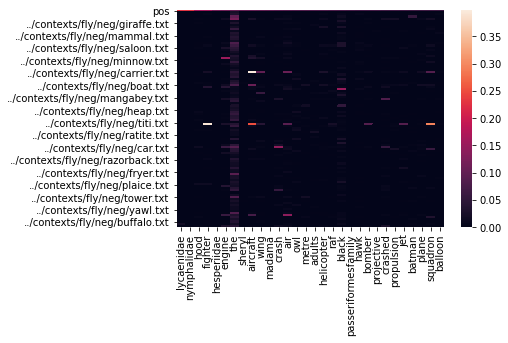

In [27]:
plt = sn.heatmap(df[:30].T, xticklabels=True)

In [106]:
vocab = vectorizer.get_feature_names()
print(len(vocab))

286


In [107]:
vectorizer.vocabulary_['love']

143

In [108]:
vec_pos = x[0]
vec_neg = x[1]
vec_dict = dict()
vec_dict['pos'] = vec_pos
vec_dict['neg'] = vec_neg

In [109]:
df = pd.DataFrame(vec_dict, index = vocab).sort_values('pos', ascending=False)
df

,pos,neg
summer,0.232574,0.000000
the,0.220638,0.208484
love,0.155049,0.000000
where,0.155049,0.000000
st,0.155049,0.000000
...,...,...
increased,0.000000,0.048836
indeed,0.000000,0.048836
industrial,0.000000,0.048836
instead,0.000000,0.048836


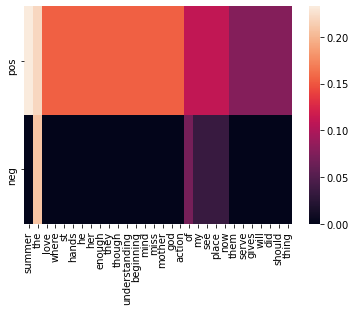

In [110]:
plt = sn.heatmap(df[:30].T, xticklabels=True)

In [120]:
# context manipulation
pairs_manipulated = []
contexts_target = [(w, c) for w, c in pairs if w == target_pos]
n_total = len(contexts_target)
# manipulate 10%
n_percent = round(0.1 * n_total)
print(n_total, n_percent)


# manipulate every nth (n_percent) context
# replace context with manipulation word

cnt = 0
for w, c in pairs:
    new_pair = (w, c)
    if w == target_pos:
        if cnt % n_percent == 0:
            #print(w, c)
            #print('replacing concept with ', target_manipulation)
            #print(w, target_manipulation)
            new_pair = (w, target_manipulation)
        cnt += 1
    pairs_manipulated.append(new_pair)
        

152 15


In [121]:
print(len(pairs), len(pairs_manipulated))

287901 287901


In [12]:
# test - success 

from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')


text = (
  'Pusheen and Smitha walked along the beach. '
  'Pusheen wanted to surf, but fell off the surfboard.')
output = nlp.annotate(text, properties={
  'annotators': 'tokenize,ssplit,pos,depparse,parse',
  'outputFormat': 'json'
  })
print(output['sentences'][0]['parse'])

(ROOT
  (S
    (NP (NNP Pusheen)
      (CC and)
      (NNP Smitha))
    (VP (VBD walked)
      (PP (IN along)
        (NP (DT the) (NN beach))))
    (. .)))
